In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import time
%matplotlib inline

In [2]:
def polar_image(image, range_bins, angle_bins, fov_deg):
    angle_bin_res = fov_deg / angle_bins

    latitude_bins = int(range_bins * np.sin(fov_deg / 180 * np.pi) + 1)
    polar = np.zeros((range_bins, latitude_bins * 2))

    x = np.arange(1, range_bins, 1, dtype=int)
    y = np.arange(0, latitude_bins * 2, 1, dtype=int)
    X_data, Y_data = np.meshgrid(x, y)

    #print(time.time())
    b = 180 * np.arctan(
        (Y_data - latitude_bins) /
        X_data) / angle_bin_res / np.pi + fov_deg / angle_bin_res / 2
    a = X_data / (np.cos((angle_bin_res * b - fov_deg / 2) / 180 * np.pi))
    b = b.astype(int)
    a = a.astype(int)

    idx = np.where(
        np.logical_and(
            np.logical_and(np.less(b, angle_bins), np.greater_equal(b, 0)),
            np.logical_and(np.less(a, range_bins), np.greater_equal(a, 0))))
    b = b[idx]
    a = a[idx]
    xx = X_data[idx]
    yy = Y_data[idx]

    polar[xx, yy] = image[a, b]
    #print(time.time())
    return polar

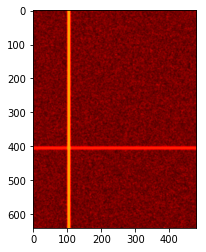

In [3]:
fov_deg = 120
range_bins = 640
angle_bins = 480

data = abs(np.random.randn(range_bins, angle_bins))

data[400:410, :] = 2
data[:, 100:110] = 3

plt.imshow(data, cmap="hot", interpolation="bicubic")

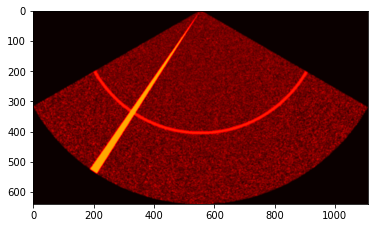

In [4]:
plt.imshow(
    polar_image(data, range_bins, angle_bins, fov_deg),
    cmap="hot",
    interpolation="bicubic")